# Proyek Analisis Data: Bike Sharing
- **Nama:** Yunita Eka Riyanti
- **Email:** yunitaeka375@gmail.com
- **ID Dicoding:** yunitariyanti_

## Menentukan Pertanyaan Bisnis

- Bagaimana performa persewaan sepeda dalam dua tahun terakhir?
- Berapa persen perbandingan persewaan sepeda pada weekdays dan weekend?
- Bagaimana rata rata jumlah penyewa sepeda berdasarkan musim?
- Bagaimana rata rata jumlah penyewa sepeda berdasarkan kondisi cuaca?
- Bagaimana rata rata jumlah penyewa sepeda berdasarkan hari?


## Import Semua Packages/Library yang Digunakan

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset "Bike Sharing" terdapat data per hari(day.csv) dan per jam (hour.csv), namun pada proyek kali ini saya akan menggunakan dataset hour.csv

In [75]:
#hour.csv
hour_df = pd.read_csv("https://raw.githubusercontent.com/yunitariyanti/Bike-Sharing-Dataset/bad35f185cdbc3baf9f5e3295198fe4939f95ad0/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** berikut adalah penjelasan dari beberapa kolom pada dataset diatas
- instant: nomor urut baris
- dteday: tanggal
- season: musim (1: spring, 2: summer, 3: fall, 4: winter)
- yr: tahun (0: 2011, 1:2012)
- mnth: bulan (1: jan, 2: feb, 3: mar, 4: apr, 5: mei, 6: jun, 7: jul, 8: agt, 9: sep, 10: okt, 11: nov, 12: des)
- hr: jam (0 sampai 23)
- weekday: hari (0: minggu, 1: senin, 2: selasa, 3: rabu, 4: kamis, 5: jumat, 6: sabtu
- workingday: 1 jika hari kerja dan 0 jika bukan hari kerja
- weathersit: kondisi cuaca (1: clear/partly cloudy, 2: misty/cloudy, 3: light snow/light rain, 4: heavy rain/thunderstorm)
- temp: suhu normal dalam celcius
- atemp: suhu "feels like" dalam celcius
- hum: kelembapan
- windspeed: kecepatan angin
- casual: jumlah pengguna kasual (tidak terdaftar)
- registered: jumlah pengguna terdaftar
- cnt: jumlah total pengguna (kasual dan terdaftar)

### Assessing Data

In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [77]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- dataset ini memiliki 17 kolom dengan tipe data numerik, float dan object (kolom dteday yang kemungkinan inaccurate)
- dataset ini tidak memiliki data yang terduplikasi

### Cleaning Data

In [78]:
#mengubah nama kolom
print(hour_df.columns)
hour_df = hour_df.rename(columns={'dteday':'date',
                                    'hr':'hour',
                                    'yr':'year',
                                    'mnth':'month',
                                    'hum':'humidity',
                                    'cnt':'count'})
print(hour_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [79]:
#mengubah tipe data
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

**Insight:**
- Dilakukan perubahan nama dari beberapa kolom yang sebelumnya namanya tersingkat untuk memudahkan
- Untuk kolom date juga dilakukan perubahan time data menjadi datetime

## Exploratory Data Analysis (EDA)

In [80]:
hour_df.describe()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [81]:
#mengubah tipe kolom menjadi category
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [82]:
#transformasi isi data dari angka menjadi keterangan
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['year'] = hour_df['year'].map({
    0: 2011, 1: 2012})
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Weekend', 1: 'Weekday'})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Light Rain', 4: 'Heavy Rain/Thunderstorm'})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Weekend,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Weekend,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Weekend,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Weekend,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Weekend,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [83]:
#Performa persewaan sepeda
performa_df = hour_df.resample(rule='M', on='date').agg({
    'count': 'sum'
})
performa_df = performa_df.reset_index()
performa_df.rename(columns={
    'count': 'total penyewa sepeda'
}, inplace=True)
performa_df.head()

<ipython-input-83-59dc864d0db2>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  performa_df = hour_df.resample(rule='M', on='date').agg({


,date,total penyewa sepeda
0,2011-01-31,38189
1,2011-02-28,48215
2,2011-03-31,64045
3,2011-04-30,94870
4,2011-05-31,135821


In [84]:
#perbandingan persewaan sepeda pada weekdays dan weekend
hour_df.groupby('workingday').agg({
    'count' : 'sum'})

<ipython-input-84-7fb73607fdce>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('workingday').agg({


,count
workingday,
Weekend,1000269
Weekday,2292410


In [85]:
#rata-rata penyewa sepeda berdasarkan musim
by_season = hour_df.groupby('season')[['registered','casual']].mean().reset_index()
print(by_season)

   season  registered     casual
0  Spring   96.823668  14.290901
1  Summer  162.183488  46.160581
2    Fall  185.729093  50.287144
3  Winter  168.202032  30.666824


<ipython-input-85-5d554da2199f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_season = hour_df.groupby('season')[['registered','casual']].mean().reset_index()


In [86]:
#rata-rata penyewa sepeda berdasarkan kondisi cuaca
by_weather = hour_df.groupby('weathersit')[['registered','casual']].mean().reset_index()
print(by_weather)

                weathersit  registered     casual
0      Clear/Partly Cloudy  164.323841  40.545431
1             Misty/Cloudy  145.570202  29.595290
2    Light Snow/Light Rain   95.523608  16.055673
3  Heavy Rain/Thunderstorm   71.666667   2.666667


<ipython-input-86-acf116ec03bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_weather = hour_df.groupby('weathersit')[['registered','casual']].mean().reset_index()


In [87]:
#rata-rata penyewa sepeda berdasarkan hari
by_day = hour_df.groupby('weekday')[['registered','casual']].mean().reset_index()
print(by_day)

  weekday  registered     casual
0     Sun  121.305356  56.163469
1     Mon  155.191206  28.553449
2     Tue  167.658377  23.580514
3     Wed  167.971313  23.159192
4     Thu  171.564144  24.872521
5     Fri  164.677121  31.458786
6     Sat  128.962978  61.246815


<ipython-input-87-7204deeb249d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_day = hour_df.groupby('weekday')[['registered','casual']].mean().reset_index()


**Insight:**
- Beberapa tipe kolom diubah menjadi category karena isinya juga akan diubah sesuai penjelasan
- Pada pola persewaan sepeda didapatkan selama 2011 dan 2012 terjadi peningkatan
- Dibandingkan dengan weekend sebagian besar penyewaan sepeda lebih banyak terjadi di weekdays
- Jumlah penyewa sepeda cenderung lebih banyak di fall season (musim gugur) dengan cuaca cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa persewaan sepeda dalam dua tahun terakhir?

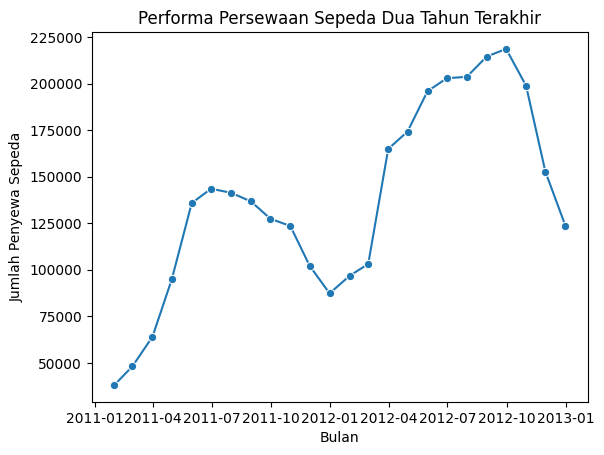

In [88]:
sns.lineplot(
    data=performa_df,
    x="date",
    y="total penyewa sepeda",
    marker="o")

plt.title("Performa Persewaan Sepeda Dua Tahun Terakhir")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.show()


**Insight:**
- Jumlah penyewaan sepeda dari tahun 2011 ke 2012 mengalami naik turun, umumnya pada awal tahun naik dan turun pada akhir tahun

### Pertanyaan 2: Berapa persen perbandingan persewaan sepeda pada weekdays dan weekend?

<ipython-input-89-cd5f268d6a1a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perbandingan = hour_df.groupby('workingday').agg({


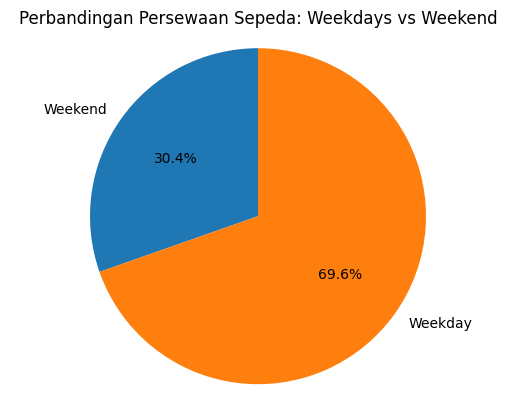

In [89]:
perbandingan = hour_df.groupby('workingday').agg({
    'count' : 'sum'})

labels = perbandingan.index.tolist()  # Get the 'workingday' values (Weekdays, Weekend)
sizes = perbandingan['count'].tolist()  # Get the corresponding mean 'count' values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Perbandingan Persewaan Sepeda: Weekdays vs Weekend')
plt.axis('equal')
plt.show()

**Insight:**
- 69,6% orang cenderung lebih suka menyewa sepeda di weekday

### Pertanyaan 3: Bagaimana rata-rata jumlah penyewa sepeda berdasarkan musim

<ipython-input-90-25540fd6b2e7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_season = hour_df.groupby('season')[['registered','casual']].mean().reset_index()


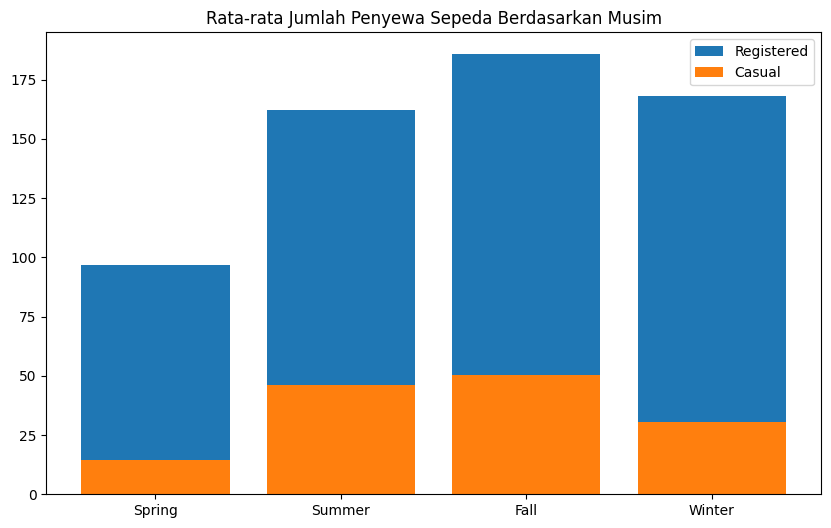

In [90]:
by_season = hour_df.groupby('season')[['registered','casual']].mean().reset_index()
plt.figure(figsize=(10,6))

plt.bar(
    by_season['season'],
    by_season['registered'],
    label='Registered')
plt.bar(
    by_season['season'],
    by_season['casual'],
    label='Casual')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

**Insight:**
Fall season (musim gugur) menjadi musim yang paling dominan penyewa minati untuk menyewa sepeda

### Pertanyaan 4: Bagaimana rata-rata jumlah penyewa sepeda berdasarkan kondisi cuaca?

<ipython-input-91-6025e931b291>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_weather = hour_df.groupby('weathersit')[['registered','casual']].mean().reset_index()


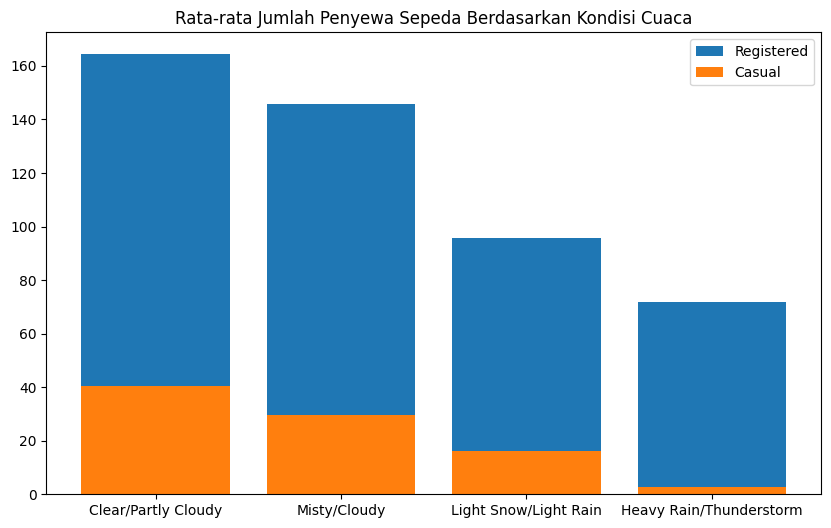

In [91]:
by_weather = hour_df.groupby('weathersit')[['registered','casual']].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(
    by_weather['weathersit'],
    by_weather['registered'],
    label='Registered')
plt.bar(
    by_weather['weathersit'],
    by_weather['casual'],
    label='Casual')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca')
plt.legend()
plt.show()

**Insight**: Kondisi cuaca yang cerah cenderung membuat orang tertarik menyewa sepeda dibandingkan kondisi cuaca dengan hujan berat

### Pertanyaan 5: Bagaimana rata rata jumlah penyewa sepeda berdasarkan hari?

<ipython-input-92-97201b4e6348>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_day = hour_df.groupby('weekday')[['registered','casual']].mean().reset_index()


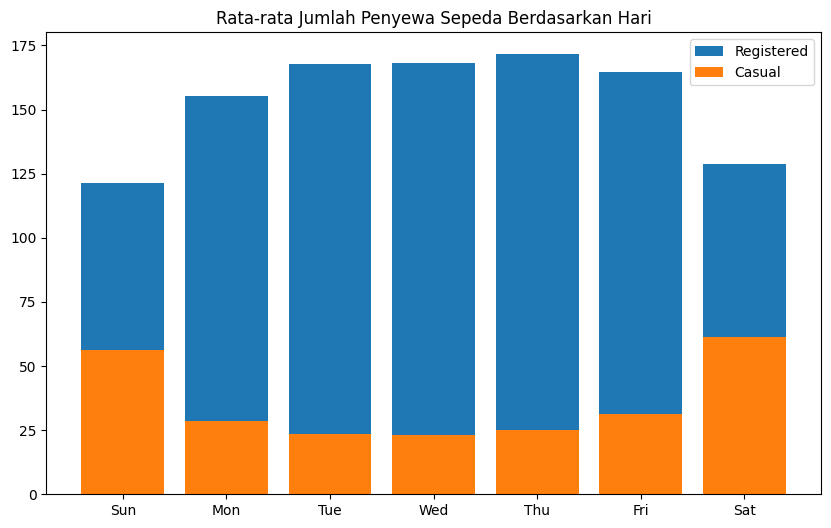

In [92]:
by_day = hour_df.groupby('weekday')[['registered','casual']].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(
    by_day['weekday'],
    by_day['registered'],
    label='Registered')
plt.bar(
    by_day['weekday'],
    by_day['casual'],
    label='Casual')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata Jumlah Penyewa Sepeda Berdasarkan Hari')
plt.legend()
plt.show()

**Insight**: Minat orang menyewa sepeda cenderung banyak terjadi pada weekdays(senin - jumat)

## Analisis Lanjutan (Opsional)

### Rentang waktu orang tertarik menyewa sepeda

<ipython-input-93-2857af7b6698>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


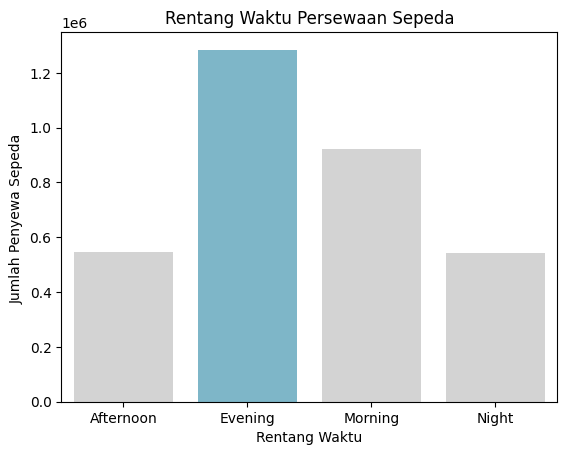

In [93]:
#membuat rentang waktu
def bagi_waktu(hour):
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 15:
    return 'Afternoon'
  elif 15 <= hour < 20:
    return 'Evening'
  else:
    return 'Night'

hour_df['rentang_waktu'] = hour_df['hour'].apply(bagi_waktu)

rentang_waktu_df = hour_df.groupby('rentang_waktu').agg({
    'count' : 'sum'})

colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    data=rentang_waktu_df,
    x='rentang_waktu',
    y='count',
    palette=colors)

plt.title('Rentang Waktu Persewaan Sepeda')
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Penyewa Sepeda ')

plt.show()

**Insight**: Evening(pukul 15-19) menjadi rentang waktu terbaik untuk sebagian orang menyewa sepeda dengan mencapai lebih dari 1 juta penyewa

## Conclusion

### Pertanyaan 1: Bagaimana performa persewaan sepeda dalam dua tahun terakhir?
Performa persewaan sepeda dari tahun 2011 sampai 2012 cenderung naik dan turun. Peningkatan persewaan sepeda ini terjadi dari awal hingga pertengahan tahun dan mengalami penurusan di akhir tahun

### Pertanyaan 2: Berapa persen perbandingan persewaan sepeda pada weekdays dan weekend?
Persewaan sepeda cenderung tinggi pada weekdays sebesar 69,6% dibandingkan pada weekend sebesar 30,4%. Hal ini menunjukkan sebagian besar orang menyewa sepeda digunakan untuk menunjang aktivitas yang dilakukan

### Pertanyaan 3: Bagaimana rata-rata jumlah penyewa sepeda berdasarkan musim?
Kategori registered menjadi jumlah yang paling banyak penyewa sepeda. Dimana rata-rata orang berminat menyewa sepeda pada fall season (musim gugur). Hal ini mengindikasikan bahwa musim gugur memang musim yang cocok untuk menikmati waktu dengan bersepeda

### Pertanyaan 4: Bagaimana rata-rata jumlah penyewa sepeda berdasarkan kondisi cuaca?
Selain musim, cuaca juga menjadi faktor untuk menyewa sepeda. Kondisi cuaca cerah menjadi kondisi cuaca terbanyak untuk bersepeda dengan rata rata lebih dari 200 untuk kategori registered dan casual. Hal ini berbanding terbalik saat kondisi cuaca hujan lebat yang menjadi cuaca kurang diminati untuk bersepeda dengan rata rata hanya 73 untuk kategori registered dan casual

### Pertanyaan 5: Bagaimana rata-rata jumlah penyewa sepeda berdasarkan hari?
Selain musim dan kondisi cuaca, hari juga menjadi faktor untuk menyewa sepeda. Jika sebelumnya diketahui perbandingan persewaan sepeda hampir 40% pada weekdays dan weekend, hal ini dapat diketahui lebih lanjut bahwa orang menyewa sepeda cenderung stabil pada hari senin-rabu dengan rata rata kurang lebih 170 dan terbanyak pada hari jumat dengan rata-rata hampir mencapai 200

In [94]:
hour_df.to_csv('hour_df.csv', index=False)